# 量子傅里叶变换(QFT)

## 0 简介

​		在我们解决数学或计算机问题时，一个行之有效的办法是将其转化为另一个已知有解的问题。离散傅里叶变换就是其中一种，相比离散傅里叶变换来说，量子傅里叶变换在本质上与其相同，但具有能够在量子计算机上更快实现的优势。因此量子傅里叶变换在量子计算中具有十分重要的意义。

## 1 算法介绍

### 1.1 离散傅里叶变换(DFT)

​		离散傅里叶变换是向量($x_{0}$,$x_{1}$,…,$x_{N-1}$)到向量($y_{0}$,$y_{1}$,…,$y_{N-1}$)的映射变换，变换关系为：
$$
y_{k}=\frac{1}{\sqrt{N}}\sum_{j=0}^{N-1}x_{j}e^{2\pi ijk/N}   \tag{1}
$$
​		离散傅里叶变换的本质是基变换，上述过程就是将一组基($x_{0}$,$x_{1}$,…,$x_{N-1}$)用另一组基($y_{0}$,$y_{1}$,…,$y_{N-1}$)表示的过程。

### 1.2 量子傅里叶变换(QFT)

​		与离散傅里叶变换相同，量子傅里叶变换就是将基向量变为了量子态$\left | 0  \right \rangle$,$\left | 1  \right \rangle$,…,$\left | N-1  \right \rangle$,其公式为：
$$
\left|j\right\rangle=\frac{1}{\sqrt{N}}\sum_{k=0}^{N-1}e^{2\pi ijk/N}\left|k\right\rangle   \tag{2}
$$
​		因此任意量子态可以写成如下形式：
$$
\sum_{j=0}^{N-1}x_{j}\left|j\right\rangle=\sum_{k=0}^{N-1}y_{k}\left|k\right\rangle \tag{3}
$$
​		其中系数$y_{k}$是对$x_{j}$做离散傅里叶变换得到的。通过以上定义，可以得到量子傅里叶变换是一个酉变换，在补充说明4.1中给出了详细证明。

### 1.3 QFT的乘积表示

​		在接下来的过程中，为了简洁起见，我们取$N=2^n$，$n$是整数。并且采用二进制表示$j$
$$
j=j_{1}j_{2}…j_{n}.j_{l}j_{l+1}…j_{m}=j_{1}2^{n-1}+…+j_{n}2^{0}+j_{l}/2^{1}+…+j_{m}/2^{m-l+1} \tag{4}
$$
​		量子傅里叶变换的乘积表示为：

​
$$
\left|j_{1},\dots,j_{n}\right\rangle=\frac{(\left|0\right\rangle+e^{2\pi i0.j_{n}}\left|1\right\rangle)(\left|0\right\rangle+e^{2\pi i0.j_{n-1}j_{n}}\left|1\right\rangle)…(\left|0\right\rangle+e^{2\pi i0.j_{1}…j_{n}}\left|1\right\rangle)}{2^{n/2}}  \tag{5}
$$
​		通过一些数学推导我们可以证明式(2)和式(5)是等价的，证明如下：
$$
\begin{equation}
\begin{aligned}
   \left|j\right\rangle&=\frac{1}{2^{n/2}}\sum_{k=0}^{2^n-1}e^{2\pi ijk/2^{n}}\left|k\right\rangle  \\
&=\frac{1}{2^{n/2}}\sum_{k_{1}=0}^{1}…\sum_{k_{n}=0}^{1}e^{2\pi ij(\sum_{l=1}^{n}k_{l}2^{-l})}\left|k_1…k_n\right\rangle    \\
&=\frac{1}{2^{n/2}}\sum_{k_{1}=0}^{1}…\sum_{k_{n}=0}^{1}\bigotimes\limits_{l=1}\limits^{n}e^{2\pi ijk_{l}2^{-l}}\left|k_l\right\rangle  \\
&=\frac{1}{2^{n/2}}\bigotimes\limits_{l=1}\limits^{n}[\sum_{k_{l}=0}^{1}e^{2\pi ijk_{l}2^{-1}\left|k_l\right\rangle}] \\
&=\frac{1}{2^{n/2}}\bigotimes\limits_{l=1}\limits^{n}[\left|0\right\rangle+e^{2\pi ij2^{-l}}\left|1\right\rangle] \\
&=\frac{(\left|0\right\rangle+e^{2\pi i0.j_{n}}\left|1\right\rangle)(\left|0\right\rangle+e^{2\pi i0.j_{n-1}j_{n}}\left|1\right\rangle)…(\left|0\right\rangle+e^{2\pi i0.j_{1}…j_{n}}\left|1\right\rangle)}{2^{n/2}}
\end{aligned}
\end{equation}
$$
​		其中用到了张量积与求和符号的交换，以及二进制表示。乘积表示的有用之处在于，它允许我们构建一个有效的量子电路来实施量子傅里叶变换，这在下一小节可以看到。

### 1.4 量子傅里叶变换电路

​		通过上一小节的乘积表示，构造量子傅里叶变换电路将会变得更容易。如下图所示：

![](D:\xmk资料\2023前沿物理科研实践\量子傅里叶变换电路.png)

​		引入幺正变换$R_k$,$R_k$的矩阵表示如下：

​
$$
R_k\equiv \begin{bmatrix}
1  & 0\\
0  & e^{2\pi i/2^k}
\end{bmatrix} \tag{6}
$$
​		因此我们将H门作用于第一个比特$\left | j_1  \right \rangle$上，可以得到：

​
$$
公式






				H\left | j_1  \right \rangle=\frac{1}{\sqrt{2}}\left(\left|0\right\rangle+e^{2\pi i0.j_1}\left|1\right\rangle\right)
$$
​		因为$j_1=1$时，$e^{2\pi i0.j_1}=-1$,而$j_1=0$时，$e^{2\pi i0.j_1}=1$。然后我们再将$controlled$-$R_2$门作用在上面，当$j_2=0$时，$e^{2\pi i0.j_1}=e^{2\pi i0.j_1j_2}$,而$j_2=1$时，$e^{2\pi i0.j_1}·e^{2\pi i/2^2}=e^{2\pi i0.j_1j_2}$。因此$\left|1\right\rangle$比特的系数变为$e^{2\pi i0.j_1j_2}$。

​		依此类推，当我们将$controlled$-$R_3$门,$controlled$-$R_4$门,……,一直到$controlled$-$R_n$门作用在其上，可以得到:
$$
\frac{1}{\sqrt{2}}\left(\left|0\right\rangle+e^{2\pi i0.j_1…j_{n}}\left|1\right\rangle\right)
$$
​		这就是乘积表示的最右边一项，同理按照图1所示对第二个比特至第n个比特先进行Hadamard门，再作用$controlled$-$R_k$ ~ $controlled$-$R_{n-k+1}$门可得乘积表示的剩下n-1项，最后使用简易的Swap门交换各个比特就能得到公式(5)的结果。

### 1.5 量子傅里叶变换电路说明

​		从上述1.4的推导不难看出，量子傅里叶变换是幺正的，因为电路中的每个门都是幺正变换门。

​		两比特的量子傅里叶变换如下图所示，其中$\omega = e^{\frac{2\pi i}{4}}= i$:

​
$$
\frac{1}{2} \begin{bmatrix}
1  & 1 & 1 & 1 \\
1  & i & -1 & -i \\
1  & -1 & 1 & -1 \\
1  & -i & -1 & -i
\end{bmatrix}
$$
​		量子傅里叶变换的时间复杂度也可以由1.4的推导得出，对每个比特需要的操作数分别为$n,n-1,……,1$，总共有$\frac{n(n+1)}{2}$个操作。此外还需要至多$n/2$个交换操作，因此总的时间复杂度为$\Theta (n^2)$。

​		而经典的快速傅里叶变换算法处理这$2^n$个元素需要$\Theta (n2^n)$的时间复杂度，因此从理论上来说，量子傅里叶变换具有所需时间更短，实现更快的优势。



## 2 电路演示

### 2.1 例子：3比特QFT

​		假设我们对一个三量子比特的态$\left|5\right\rangle=\left|101\right\rangle$作量子傅里叶变换，根据公式(5)，我们将得到：

​
$$
\begin{equation}
\begin{aligned}
\frac{1}{\sqrt{8} } \left(\left|0\right\rangle+e^{2\pi i*5/2}\left|1\right\rangle\right)\left(\left|0\right\rangle+e^{2\pi i*5/4}\left|1\right\rangle\right)\left(\left|0\right\rangle+e^{2\pi i*5/8}\left|1\right\rangle\right) \\
=\frac{1}{\sqrt{8}} \left(\left|0\right\rangle\left|1\right\rangle\right)\left(\left|0\right\rangle+i\left|1\right\rangle\right)\left(\left|0\right\rangle+(-\frac{\sqrt{2}}{2}-i\frac{\sqrt{2}}{2})\left|1\right\rangle\right) \\
=\frac{1}{\sqrt{8}}\left|000\right\rangle+(-\frac{1}{4}-\frac{i}{4})\left|001\right\rangle+\frac{i}{\sqrt{8}}\left|010\right\rangle+(\frac{1}{4}-\frac{i}{4})\left|011\right\rangle \\
-\frac{1}{\sqrt{8}}\left|100\right\rangle+(\frac{1}{4}+\frac{i}{4})\left|101\right\rangle-\frac{i}{\sqrt{8}}\left|110\right\rangle+(-\frac{1}{4}+\frac{i}{4})\left|111\right\rangle
\end{aligned}
\end{equation}
$$
​		这就是对$\left|5\right\rangle$进行量子傅里叶变换得到的结果，下面我们用程序及实验验证这一点。

### 2.2 QFT电路搭建

​		下面我们用python程序实现QFT电路的搭建和模拟：

In [17]:
#导入需要的包
from quafu import QuantumCircuit,Task,simulate
import numpy as np
import matplotlib.pyplot as plt
from numpy import pi

#循环实现QFT中的Rk门和H门
def qft_rotation(circuit,n):
    for i in range(n):
        circuit.h(i)#对每个比特先添加H门
        for k in range(n-i-1):
            circuit.cp(i+1+k,i,np.pi/(2 ** (k+1))) #每个比特添加n-i-1个Rk旋转门，在pyquafu里是cp门
            #第一个参数是控制比特，第二个参数是目标比特，第三个参数是旋转相位
    return circuit

def swap_register(circuit, n):  # 翻转末态
    for qubit in range(n // 2):
        circuit.swap(qubit, n - qubit - 1)  # 使用swap门执行翻转
    return circuit

def qft(circuit, n):#同时执行旋转和交换构成QFT
    qft_rotation(circuit, n)
    swap_register(circuit, n)
    return circuit

#4比特电路图展示
qc=QuantumCircuit(4)
qft(qc,4)
qc.draw_circuit(width=4)

q[0]  --H----P(1.571)----P(0.785)----P(0.393)-------------------------------------------------------x-------
                |           |           |                                                           |       
q[1]  ----------*-----------|-----------|--------H----P(1.571)----P(0.785)--------------------------|----x--
                            |           |                |           |                              |    |  
q[2]  ----------------------*-----------|----------------*-----------|--------H----P(1.571)---------|----x--
                                        |                            |                |             |       
q[3]  ----------------------------------*----------------------------*----------------*--------H----x-------


In [18]:
#模拟验证3比特QFT例子
qc_3=QuantumCircuit(3)
qc_3.x(0)
qc_3.x(2)
qft(qc_3,3)
qc_3.draw_circuit(width=4)
simu_res = simulate(qc_3,output='state_vector')
print(simu_res.get_statevector())

q[0]  --X----H----P(1.571)----P(0.785)--------------------------x--
                     |           |                              |  
q[1]  ---------------*-----------|--------H----P(1.571)---------|--
                                 |                |             |  
q[2]  --X------------------------*----------------*--------H----x--
[ 3.53553391e-01+0.j         -3.53553391e-01+0.j
  4.32978028e-17+0.35355339j -4.32978028e-17-0.35355339j
 -2.50000000e-01-0.25j        2.50000000e-01+0.25j
  2.50000000e-01-0.25j       -2.50000000e-01+0.25j      ]


可以看到经过QFT电路后的态与2.1的结果是吻合的，因此模拟论证成功。

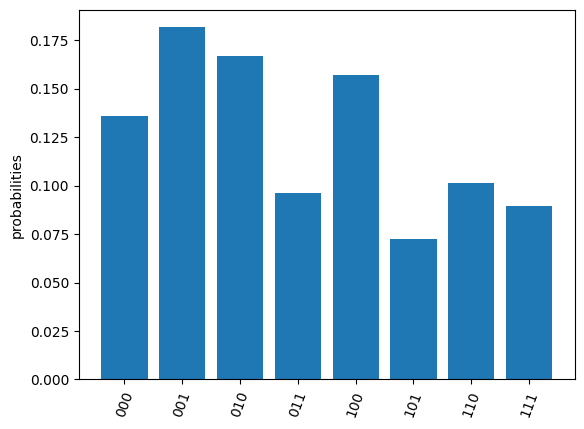

In [19]:
#实验验证3比特QFT例子
task = Task()
task.config(backend='ScQ-P18',shots=8000,compile=True)
res = task.send(qc_3)
res.plot_probabilities()

预期的结果应该每个比特测得的概率是0.125，有一定的误差存在